In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import statsmodels
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [49]:
    gwq='calcium'
    # Reading data from the csv
    data = pd.read_csv(r"..\Excels\merged_table.csv")

    # Convert numeric columns to appropriate data type
    data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
    data[gwq] = pd.to_numeric(data[gwq], errors='coerce')
    data['Gini'] = pd.to_numeric(data['Gini'], errors='coerce')

    # Drop rows with NaN values
    data.dropna(subset=['SDP', gwq,'Gini'], inplace=True)

    # Defining the variables
    x = data['SDP'].values.reshape(-1, 1)  # Independent variable
    y = data[gwq].values  # Dependent variable
    x2 = x ** 2
    x3 = x ** 3
    x4 = data['Gini'].values.reshape(-1, 1)  # Fourth variable

    # Create polynomial features
    poly = PolynomialFeatures(degree=3)  # You can change the degree here
    X_poly = poly.fit_transform(x)

    # Add fourth variable
    X_poly = np.concatenate((X_poly, x4), axis=1)

    # Fit the model
    model = LinearRegression(fit_intercept=True).fit(X_poly, y)

    # Get coefficients and intercept
    intercept = model.intercept_
    coefficients = model.coef_

    # Print coefficients
    print("Intercept:", intercept)
    print("Coefficients:", coefficients)

    # Evaluate R^2
    r_squared = model.score(X_poly, y)
    print("R^2:", r_squared)


Intercept: 38.077692952282774
Coefficients: [ 0.00000000e+00  2.33811881e-04 -4.87236665e-10  2.91541964e-16
  3.45292750e-11]
R^2: 0.05084670024189275


In [50]:
# Calculate the residuals
y_pred = model.predict(X_poly)
residuals = y - y_pred

# Number of observations
n = len(y)

# Number of predictors (including intercept)
p = X_poly.shape[1]

# Degrees of freedom
df = n - p

# Residual standard error (RSE)
RSE = np.sqrt(np.sum(residuals**2) / df)

# Calculate the variance-covariance matrix of coefficients
XtX_inv = np.linalg.inv(X_poly.T @ X_poly)
var_cov_matrix = RSE**2 * XtX_inv

# Standard errors of coefficients (square root of diagonal of var-cov matrix)
std_errs = np.sqrt(np.diag(var_cov_matrix))

# Calculate t-statistics
t_stats = coefficients / std_errs

# Print results
print("Intercept:")
print(f"  Coefficient value: {intercept}")
print(f"  Standard error: {std_errs[0]}")
print(f"  T-statistic: {t_stats[0]}")

for i, coef in enumerate(coefficients):
    if i == 0:
        continue
    print(f"Coefficient {i}:")
    print(f"  Coefficient value: {coef}")
    print(f"  Standard error: {std_errs[i]}")
    print(f"  T-statistic: {t_stats[i]}")


Intercept:
  Coefficient value: 38.077692952282774
  Standard error: 2.5021096456154654
  T-statistic: 0.0
Coefficient 1:
  Coefficient value: 0.00023381188092271536
  Standard error: 1.4888994570839826e-05
  T-statistic: 15.703671581735758
Coefficient 2:
  Coefficient value: -4.872366649457878e-10
  Standard error: 4.0227039158025214e-11
  T-statistic: -12.112168211827866
Coefficient 3:
  Coefficient value: 2.9154196418135214e-16
  Standard error: 2.81941350036923e-17
  T-statistic: 10.340518130567647
Coefficient 4:
  Coefficient value: 3.452927499651853e-11
  Standard error: 8.083159148385302
  T-statistic: 4.2717549367336316e-12


In [53]:
# Number of observations
n = len(x)

# Mean squared error (MSE)
mse = np.mean((model.predict(X_poly) - y) ** 2)

# Mean of the predictor variable (SDP)
mean_X = np.mean(x)

# Difference between each predictor variable value and its mean
X_diff = x - mean_X

# Sum of squares of the differences
sum_X_diff_sq = np.sum(X_diff ** 2)

# Standard error of the intercept
se_intercept = np.sqrt(mse * (1/n + (mean_X ** 2) / sum_X_diff_sq))

# Calculate t-statistic
t_stat_intercept = intercept / se_intercept

print("Intercept:")
print(f"  Standard error: {se_intercept}")
print(f"  T-statistic: {t_stat_intercept}")


Intercept:
  Standard error: 0.6921426938396478
  T-statistic: 55.014223643751166


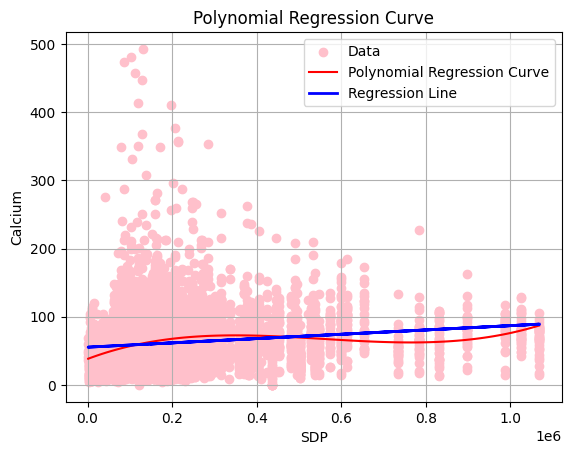

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of SDP values
sdp_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Apply polynomial transformation
sdp_poly = poly.fit_transform(sdp_values)

# Add fourth variable
sdp_poly = np.concatenate((sdp_poly, np.repeat(x4.mean(), len(sdp_poly)).reshape(-1, 1)), axis=1)

# Calculate predicted values
y_pred = model.predict(sdp_poly)

# Plot the data points
plt.scatter(x, y, color='pink', label='Data')

# Plot the polynomial regression curve
plt.plot(sdp_values, y_pred, color='red', label='Polynomial Regression Curve')
plt.plot(x, 3.159791713381556e-05 * x + 55.367403782132804, color='blue', linewidth=2, label='Regression Line')

# Add labels and title
plt.title("Polynomial Regression Curve")
plt.xlabel("SDP")
plt.ylabel("Calcium")
plt.legend()
plt.grid(True)
plt.show()
